# Task: Covid-19 Data Analysis
### This notebook is used to understand the comprehension of Data Analysis techniques using Pandas library.

### Data Source: 
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

### File naming convention

MM-DD-YYYY.csv in UTC.

### Field description

- Province_State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.

- Country_Region: country/region name conforming to WHO (will be updated).

- Last_Update: MM/DD/YYYY HH:mm (24 hour format, in UTC).

- Confirmed: the number of confirmed cases. For Hubei Province: from Feb 13 (GMT +8), we report both clinically diagnosed and lab-confirmed cases. For lab-confirmed cases only (Before Feb 17), please refer to who_covid_19_situation_reports. For Italy, diagnosis standard might be changed since Feb 27 to "slow the growth of new case numbers." (Source)

- Deaths: the number of deaths.

- Recovered: the number of recovered cases.

### Question 1

#### Read the dataset

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# set this so the 
%matplotlib inline


data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-21-2021.csv')
data


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-22 05:22:10,33.939110,67.709953,54403,2363,46887,5153.0,Afghanistan,139.751653,4.343510
1,NaN,NaN,NaN,Albania,2021-01-22 05:22:10,41.153300,20.168300,69916,1296,42426,26194.0,Albania,2429.494753,1.853653
2,NaN,NaN,NaN,Algeria,2021-01-22 05:22:10,28.033900,1.659600,104852,2853,71343,30656.0,Algeria,239.109478,2.720978
3,NaN,NaN,NaN,Andorra,2021-01-22 05:22:10,42.506300,1.521800,9379,93,8474,812.0,Andorra,12138.743286,0.991577
4,NaN,NaN,NaN,Angola,2021-01-22 05:22:10,-11.202700,17.873900,19177,448,17176,1553.0,Angola,58.348578,2.336132
5,NaN,NaN,NaN,Antigua and Barbuda,2021-01-22 05:22:10,17.060800,-61.796400,192,6,162,24.0,Antigua and Barbuda,196.062413,3.125000
6,NaN,NaN,NaN,Argentina,2021-01-22 05:22:10,-38.416100,-63.616700,1843077,46355,1625755,170967.0,Argentina,4077.984985,2.515088
7,NaN,NaN,NaN,Armenia,2021-01-22 05:22:10,40.069100,45.038200,165528,3021,154046,8461.0,Armenia,5586.059015,1.825069
8,NaN,NaN,Australian Capital Territory,Australia,2021-01-22 05:22:10,-35.473500,149.012400,118,3,115,0.0,"Australian Capital Territory, Australia",27.563653,2.542373
9,NaN,NaN,New South Wales,Australia,2021-01-22 05:22:10,-33.868800,151.209300,5083,54,0,1793.0,"New South Wales, Australia",62.613944,1.062365


#### Display the top 5 rows in the data

In [24]:
data.head(5)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-22 05:22:10,33.93911,67.709953,54403,2363,46887,5153.0,Afghanistan,139.751653,4.343510
1,NaN,NaN,NaN,Albania,2021-01-22 05:22:10,41.15330,20.168300,69916,1296,42426,26194.0,Albania,2429.494753,1.853653
2,NaN,NaN,NaN,Algeria,2021-01-22 05:22:10,28.03390,1.659600,104852,2853,71343,30656.0,Algeria,239.109478,2.720978
3,NaN,NaN,NaN,Andorra,2021-01-22 05:22:10,42.50630,1.521800,9379,93,8474,812.0,Andorra,12138.743286,0.991577
4,NaN,NaN,NaN,Angola,2021-01-22 05:22:10,-11.20270,17.873900,19177,448,17176,1553.0,Angola,58.348578,2.336132


#### Show the information of the dataset

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3987 entries, 0 to 3986
Data columns (total 14 columns):
FIPS                   3266 non-null float64
Admin2                 3271 non-null object
Province_State         3813 non-null object
Country_Region         3987 non-null object
Last_Update            3987 non-null object
Lat                    3899 non-null float64
Long_                  3899 non-null float64
Confirmed              3987 non-null int64
Deaths                 3987 non-null int64
Recovered              3987 non-null int64
Active                 3985 non-null float64
Combined_Key           3987 non-null object
Incident_Rate          3897 non-null float64
Case_Fatality_Ratio    3944 non-null float64
dtypes: float64(6), int64(3), object(5)
memory usage: 436.2+ KB


#### Show the sum of missing values of features in the dataset

In [41]:
len(data)
data.count()
count_nan = len(data) - data.count()
count_nan

FIPS                   721
Admin2                 716
Province_State         174
Country_Region           0
Last_Update              0
Lat                     88
Long_                   88
Confirmed                0
Deaths                   0
Recovered                0
Active                   2
Combined_Key             0
Incident_Rate           90
Case_Fatality_Ratio     43
dtype: int64

### Question 2

#### Show the number of Confirmed cases by Country

In [45]:
data[['Country_Region', 'Confirmed']]


,Country_Region,Confirmed
0,Afghanistan,54403
1,Albania,69916
2,Algeria,104852
3,Andorra,9379
4,Angola,19177
5,Antigua and Barbuda,192
6,Argentina,1843077
7,Armenia,165528
8,Australia,118
9,Australia,5083


#### Show the number of Deaths by Country

In [44]:
data[['Country_Region', 'Deaths']]


,Country_Region,Deaths
0,Afghanistan,2363
1,Albania,1296
2,Algeria,2853
3,Andorra,93
4,Angola,448
5,Antigua and Barbuda,6
6,Argentina,46355
7,Armenia,3021
8,Australia,3
9,Australia,54


#### Show the number of Recovered cases by Country

In [47]:
data[['Country_Region', 'Recovered']]


,Country_Region,Recovered
0,Afghanistan,46887
1,Albania,42426
2,Algeria,71343
3,Andorra,8474
4,Angola,17176
5,Antigua and Barbuda,162
6,Argentina,1625755
7,Armenia,154046
8,Australia,115
9,Australia,0


#### Show the number of Active Cases by Country

In [48]:
data[['Country_Region', 'Active']]


,Country_Region,Active
0,Afghanistan,5153.0
1,Albania,26194.0
2,Algeria,30656.0
3,Andorra,812.0
4,Angola,1553.0
5,Antigua and Barbuda,24.0
6,Argentina,170967.0
7,Armenia,8461.0
8,Australia,0.0
9,Australia,1793.0


#### Show the latest number of Confirmed, Deaths, Recovered and Active cases Country-wise

In [96]:
data[['Last_Update','Country_Region', 'Confirmed','Deaths','Recovered','Active']]


,Last_Update,Country_Region,Confirmed,Deaths,Recovered,Active
0,2021-01-22 05:22:10,Afghanistan,54403,2363,46887,5153.0
1,2021-01-22 05:22:10,Albania,69916,1296,42426,26194.0
2,2021-01-22 05:22:10,Algeria,104852,2853,71343,30656.0
3,2021-01-22 05:22:10,Andorra,9379,93,8474,812.0
4,2021-01-22 05:22:10,Angola,19177,448,17176,1553.0
5,2021-01-22 05:22:10,Antigua and Barbuda,192,6,162,24.0
6,2021-01-22 05:22:10,Argentina,1843077,46355,1625755,170967.0
7,2021-01-22 05:22:10,Armenia,165528,3021,154046,8461.0
8,2021-01-22 05:22:10,Australia,118,3,115,0.0
9,2021-01-22 05:22:10,Australia,5083,54,0,1793.0


### Question 3

### Show the countries with no recovered cases

In [65]:

data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-21-2021.csv')
data

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-22 05:22:10,33.939110,67.709953,54403,2363,46887,5153.0,Afghanistan,139.751653,4.343510
1,NaN,NaN,NaN,Albania,2021-01-22 05:22:10,41.153300,20.168300,69916,1296,42426,26194.0,Albania,2429.494753,1.853653
2,NaN,NaN,NaN,Algeria,2021-01-22 05:22:10,28.033900,1.659600,104852,2853,71343,30656.0,Algeria,239.109478,2.720978
3,NaN,NaN,NaN,Andorra,2021-01-22 05:22:10,42.506300,1.521800,9379,93,8474,812.0,Andorra,12138.743286,0.991577
4,NaN,NaN,NaN,Angola,2021-01-22 05:22:10,-11.202700,17.873900,19177,448,17176,1553.0,Angola,58.348578,2.336132
5,NaN,NaN,NaN,Antigua and Barbuda,2021-01-22 05:22:10,17.060800,-61.796400,192,6,162,24.0,Antigua and Barbuda,196.062413,3.125000
6,NaN,NaN,NaN,Argentina,2021-01-22 05:22:10,-38.416100,-63.616700,1843077,46355,1625755,170967.0,Argentina,4077.984985,2.515088
7,NaN,NaN,NaN,Armenia,2021-01-22 05:22:10,40.069100,45.038200,165528,3021,154046,8461.0,Armenia,5586.059015,1.825069
8,NaN,NaN,Australian Capital Territory,Australia,2021-01-22 05:22:10,-35.473500,149.012400,118,3,115,0.0,"Australian Capital Territory, Australia",27.563653,2.542373
9,NaN,NaN,New South Wales,Australia,2021-01-22 05:22:10,-33.868800,151.209300,5083,54,0,1793.0,"New South Wales, Australia",62.613944,1.062365


In [93]:
output = data[data['Recovered']==0][['Country_Region', 'Recovered']]
output

,Country_Region,Recovered
16,Belgium,0
91,Kiribati,0
116,Micronesia,0
134,Palau,0
154,Serbia,0
167,Summer Olympics 2020,0
169,Sweden,0
181,US,0


#### Show the countries with no confirmed cases

In [92]:
output = data[data['Confirmed']==0][['Country_Region','Confirmed']]
output

,Country_Region,Confirmed
91,Kiribati,0
134,Palau,0
167,Summer Olympics 2020,0


#### Show the countries with no deaths

In [91]:
output = data[data['Deaths']==0][['Country_Region','Deaths']]
output

,Country_Region,Deaths
30,Cambodia,0
50,Dominica,0
75,Holy See,0
91,Kiribati,0
96,Laos,0
112,Marshall Islands,0
116,Micronesia,0
134,Palau,0
146,Saint Kitts and Nevis,0
149,Samoa,0


In [90]:
output = data[data['Deaths']==0][['Country_Region','Confirmed','Deaths','Recovered']]
output

,Country_Region,Confirmed,Deaths,Recovered
30,Cambodia,456,0,399
50,Dominica,113,0,104
75,Holy See,27,0,15
91,Kiribati,0,0,0
96,Laos,41,0,41
112,Marshall Islands,4,0,4
116,Micronesia,1,0,0
134,Palau,0,0,0
146,Saint Kitts and Nevis,35,0,33
149,Samoa,2,0,2


### Question 4

#### Show the Top 10 countries with Confirmed cases

In [119]:
d= data.sort_values('Confirmed', ascending=False).head(10)
d[['Country_Region', 'Recovered','Confirmed']]

,Country_Region,Recovered,Confirmed
3960,United Kingdom,0,3092041
215,France,190186,2979915
650,Turkey,2290032,2412505
268,India,1903408,2000878
6,Argentina,1625755,1843077
65,Brazil,1420484,1670754
490,Poland,1215732,1457755
594,South Africa,1183443,1380807
286,Iran,1144549,1354520
860,US,0,1046591


#### Show the Top 10 Countries with Active cases

In [116]:
c= data.groupby("Country_Region")
c=c.sum()
c=c.sort_values(["Active"],ascending=False)
c.head(10)

,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio
Country_Region,,,,,,,,,
US,105822557.0,121707.405039,-293182.487164,24713349,417868,0,24217573.0,2.482802e+07,5911.700892
United Kingdom,0.0,422.469698,-509.497466,3553777,94765,8585,3450427.0,4.017891e+04,31.125233
France,0.0,77.169695,-416.763414,3046323,72138,220650,2753582.0,2.989723e+04,8.740470
Spain,0.0,755.510158,-69.972552,2456675,55041,150376,2251258.0,9.923338e+04,42.011430
Netherlands,0.0,682.008776,-203.678156,945948,13439,12155,920354.0,7.162485e+04,20.632054
Brazil,0.0,-342.077100,-1308.973300,8697368,214147,7673092,810129.0,1.416240e+05,60.326578
Belgium,0.0,557.811200,50.113600,686827,20620,0,666207.0,6.734484e+04,171.049357
Sweden,0.0,1253.293500,330.466900,542952,10921,0,532031.0,1.005925e+05,40.724982
Russia,0.0,4527.343882,5156.031399,3616680,66810,3021861,528009.0,2.117387e+05,139.062565


### Question 5

#### Plot Country-wise Total deaths, confirmed, recovered and active casaes where total deaths have exceeded 50,000

In [20]:
import matplotlib.pyplot as plt

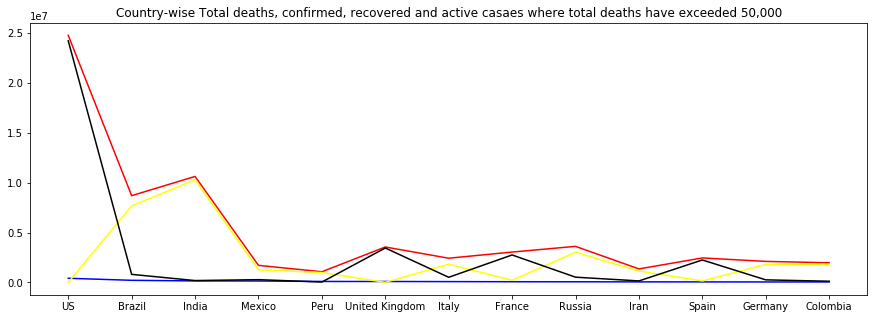

In [22]:
 
New_data = data.groupby(["Country_Region"])["Deaths", "Confirmed", "Recovered", "Active"].sum().reset_index()
New_data = New_data.sort_values(by='Deaths', ascending=False)
New_data = New_data[New_data['Deaths']>50000]
plt.figure(figsize=(15, 5))
plt.plot(New_data['Country_Region'], New_data['Deaths'],color='blue')
plt.plot(New_data['Country_Region'], New_data['Confirmed'],color='red')
plt.plot(New_data['Country_Region'], New_data['Recovered'], color='yellow')
plt.plot(New_data['Country_Region'], New_data['Active'], color='black')
 
plt.title('Country-wise Total deaths, confirmed, recovered and active casaes where total deaths have exceeded 50,000')
plt.show()

### Question 6

### Plot Province/State wise Deaths in USA

In [31]:
import plotly.express as px

In [19]:
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-09-2021.csv')

In [20]:
covid_data.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

In [32]:
import pandas as pd
pio.templates.default = "ggplot2"
us_data = data[data['Country_Region']=='US'].drop(['Country_Region','Lat', 'Long_'], axis=1)
us_data = us_data[us_data.sum(axis = 1) > 0]
us_data = us_data.groupby(['Province_State'])['Deaths'].sum().reset_index()
us_data_death = us_data[us_data['Deaths'] > 0]
state_fig = px.bar(us_data_death, x='Province_State', y='Deaths', title='State wise deaths in USA', text='Deaths')
state_fig.show()

### Question 7

### Plot Province/State Wise Active Cases in USA

In [27]:
import pandas as pd
import plotly.express as px
pio.templates.default = "plotly_dark"
us_data = data[data['Country_Region']=='US'].drop(['Country_Region','Lat', 'Long_'], axis=1)
us_data = us_data[us_data.sum(axis = 1) > 0]
us_data = us_data.groupby(['Province_State'])['Active'].sum().reset_index()
us_data_death = us_data[us_data['Active'] > 0]
state_fig = px.bar(us_data_death, x='Province_State', y='Active', title='State wise Active cases in USA', text='Active')
state_fig.show()

### Question 8

### Plot Province/State Wise Confirmed cases in USA

In [26]:
import pandas as pd
import plotly.express as px
pio.templates.default = "plotly"
us_data = data[data['Country_Region']=='US'].drop(['Country_Region','Lat', 'Long_'], axis=1)
us_data = us_data[us_data.sum(axis = 1) > 0]
us_data = us_data.groupby(['Province_State'])['Confirmed'].sum().reset_index()
us_data_death = us_data[us_data['Confirmed'] > 0]
state_fig = px.bar(us_data_death, x='Province_State', y='Confirmed', title='State wise confirmed cases in USA', text='Confirmed')
state_fig.show()

### Question 9

### Plot Worldwide Confirmed Cases over time

In [30]:

import pandas as pd
import plotly.express as px
import plotly.io as pio
pio.templates.default = "seaborn"
 
data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-21-2021.csv')
data
grouping = data.groupby('Last_Update')['Last_Update', 'Confirmed', 'Deaths'].sum().reset_index()
fig = px.line(grouping, x="Last_Update", y="Confirmed",
             title="Worldwide Confirmed Cases Over Time")
fig.show()